<a href="https://colab.research.google.com/github/Tanbir34872a/AI-Projects/blob/main/Mid/assignment_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using Cifar-10 Dataset:
### A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation

---



## Setting Up

In [1]:
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 41.76 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [2]:
import cv2
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import os,glob
from os import listdir,makedirs
from os.path import isfile,join
from tqdm import tqdm
import random
from sklearn.model_selection import KFold
import statistics as st

In [3]:
Train_Dir = '/content/CIFAR-10-images/test'
catagories = os.listdir(Train_Dir)

## Dataset & Preprocesing:

In [4]:
#for setting up training images
train_img = []
for c in catagories:
  path = os.path.join(Train_Dir, c)
  print(c, end=" - ")
  for img in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
    img_arr_resize= cv2.resize(img_arr, (32,32))
    train_img.append([img_arr_resize, c])

bird - 

100%|██████████| 1000/1000 [00:00<00:00, 6192.65it/s]


cat - 

100%|██████████| 1000/1000 [00:00<00:00, 13456.44it/s]


dog - 

100%|██████████| 1000/1000 [00:00<00:00, 6351.24it/s]


frog - 

100%|██████████| 1000/1000 [00:00<00:00, 10725.78it/s]


deer - 

100%|██████████| 1000/1000 [00:00<00:00, 11228.47it/s]


automobile - 

100%|██████████| 1000/1000 [00:00<00:00, 8006.51it/s]


truck - 

100%|██████████| 1000/1000 [00:00<00:00, 8110.59it/s]


horse - 

100%|██████████| 1000/1000 [00:00<00:00, 12292.19it/s]


ship - 

100%|██████████| 1000/1000 [00:00<00:00, 7688.94it/s]


airplane - 

100%|██████████| 1000/1000 [00:00<00:00, 11273.71it/s]


## Model Building and Evaluation:

In [5]:
random.shuffle(train_img)

In [6]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)
res = []
k_values = [22, 45, 90, 180, 360]
for (i,(train_index, test_index)),k in zip(enumerate(kf.split(train_img)),k_values):
    accuracy = [0,0] #[l1,l2]
    for x in tqdm(test_index):
        testData = cv2.calcHist([train_img[x][0]],[0],None,[256],[0,256])
        l1 = []
        l2 = []
        for y in train_index:
            trainData = cv2.calcHist([train_img[y][0]],[0],None,[256],[0,256])
            d = np.sum(abs(testData-trainData))
            l1.append(d)
            d = np.sqrt(np.sum((testData-trainData)**2))
            l2.append(d)
        l1_i = np.argsort(l1)
        l2_i = np.argsort(l2)
        comp = []
        for j in l1_i[:k]:
            comp.append(train_img[j][1])
        if st.mode(comp) == train_img[x][1]:
            accuracy[0] += 1
        for j in l2_i[:k]:
            comp.append(train_img[j][1])
        if st.mode(comp) == train_img[x][1]:
            accuracy[1] += 1
    res.append(accuracy)

100%|██████████| 2000/2000 [05:59<00:00,  5.56it/s]


## Results and Analysis:

In [7]:
L1_acc = []
L2_acc = []
for a, b in res:
  L1_acc.append(a*100/2000)
  L2_acc.append(b*100/2000)

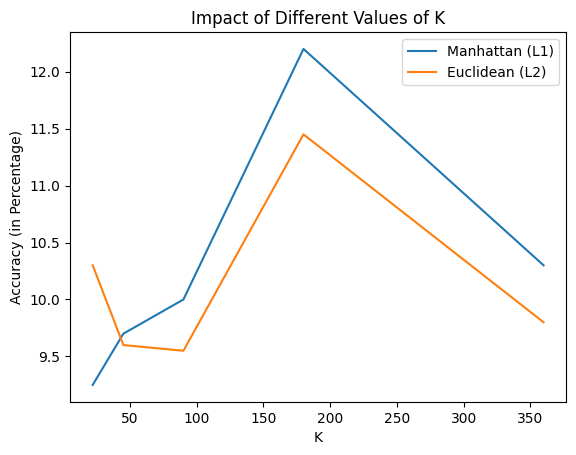

In [8]:
plt.figure()

plt.plot(k_values, L1_acc)
plt.plot(k_values, L2_acc)
plt.legend(['Manhattan (L1)','Euclidean (L2)'])
plt.xlabel('K')
plt.ylabel('Accuracy (in Percentage)')
plt.title('Impact of Different Values of K')

plt.show()